In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [ ]:
!pip -q install sastrawi

     |████████████████████████████████| 209 kB 9.2 MB/s 


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#Data Acquisition


In [ ]:
data = pd.read_csv('dataset/Emotion_Dataset.csv') 
data

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."
...,...,...
4396,love,"Tahukah kamu, bahwa saat itu papa memejamkan m..."
4397,fear,Sulitnya menetapkan Calon Wapresnya Jokowi di ...
4398,anger,"5. masa depannya nggak jelas. lha iya, gimana ..."
4399,happy,[USERNAME] dulu beneran ada mahasiswa Teknik U...


Total Jumlah data: 4401 data

terdiri dari (label):
Happy	: 1017 data
sadness	: 997 data
anger	: 1101 data
love	: 637 data
fear		: 649 data



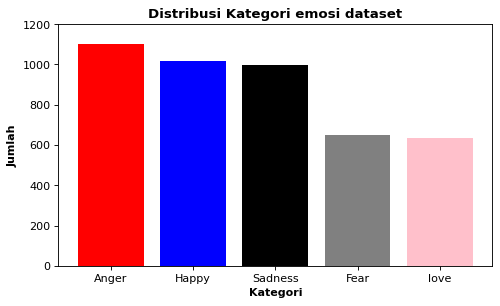

In [ ]:
print('Total Jumlah data:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('Happy\t:', data[data.label == 'happy'].shape[0], 'data')
print('sadness\t:', data[data.label == 'sadness'].shape[0], 'data')
print('anger\t:', data[data.label == 'anger'].shape[0], 'data')
print('love\t:', data[data.label == 'love'].shape[0], 'data')
print('fear\t\t:', data[data.label == 'fear'].shape[0], 'data\n')

height = data['label'].value_counts()
labels = ('Anger', 'Happy', 'Sadness','Fear','love')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,1200)
plt.title('Distribusi Kategori emosi dataset', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['red', 'blue', 'black','grey','pink'])
plt.xticks(y_pos, labels)
plt.show()

#Text Reprocessing

##Case folding








In [ ]:
import re #panggil regex

def casefolding(text):
  text = text.lower()                               
  text = re.sub(r'https?://\S+|www\.\S+', '', text) 
  text = re.sub(r'[-+]?[0-9]+', '', text)           
  text = re.sub(r'[^\w\s]','', text)                
  text = text.strip()
  return text

raw_sample = data['tweet'].iloc[5]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:  Dari sekian banyak thread yang aku baca, thread ini paling aneh sih dalam penulisan. Sumpah aneh bgt, mau ngatain "lebay" aja segala bikin thread hadeh. Aku juga ga jago nulis, tapi tulisan aku ga seberantakan thread mbaknya.
Case folding	:  dari sekian banyak thread yang aku baca thread ini paling aneh sih dalam penulisan sumpah aneh bgt mau ngatain lebay aja segala bikin thread hadeh aku juga ga jago nulis tapi tulisan aku ga seberantakan thread mbaknya


## Word Normalization

In [ ]:
# Download corpus singkatan
!wget https://raw.githubusercontent.com/Andre480/Emotion-Text-Classification/main/kamus_singkatan.csv

--2022-06-17 06:00:45--  https://raw.githubusercontent.com/Andre480/Emotion-Text-Classification/main/kamus_singkatan.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77247 (75K) [text/plain]
Saving to: ‘kamus_singkatan.csv’

kamus_singkatan.csv 100%[===================>]  75.44K  --.-KB/s    in 0.009s  

2022-06-17 06:00:46 (8.14 MB/s) - ‘kamus_singkatan.csv’ saved [77247/77247]



In [ ]:
key_norm = pd.read_csv('https://raw.githubusercontent.com/Andre480/Emotion-Text-Classification/main/kamus_singkatan.csv')

def text_normalize(teks):
  teks = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in teks.split()])
  teks = str.lower(teks)
  return teks

##Filtering

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [ ]:
more_stopword = ['lu','username','url','orang','ya']                    # Tambahkan kata dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(teks):
  clean_words = []
  teks = teks.split()
  for word in teks:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

raw_sample = data['tweet'].iloc[5]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  Dari sekian banyak thread yang aku baca, thread ini paling aneh sih dalam penulisan. Sumpah aneh bgt, mau ngatain "lebay" aja segala bikin thread hadeh. Aku juga ga jago nulis, tapi tulisan aku ga seberantakan thread mbaknya.
Case folding		:  dari sekian banyak thread yang aku baca thread ini paling aneh sih dalam penulisan sumpah aneh bgt mau ngatain lebay aja segala bikin thread hadeh aku juga ga jago nulis tapi tulisan aku ga seberantakan thread mbaknya
Stopword removal	:  sekian thread baca thread aneh sih penulisan sumpah aneh bgt ngatain lebay aja bikin thread hadeh ga jago nulis tulisan ga seberantakan thread mbaknya


##Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(teks):
  teks = stemmer.stem(teks)
  return teks

  raw_sample = data['tweet'].iloc[5]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  Dari sekian banyak thread yang aku baca, thread ini paling aneh sih dalam penulisan. Sumpah aneh bgt, mau ngatain "lebay" aja segala bikin thread hadeh. Aku juga ga jago nulis, tapi tulisan aku ga seberantakan thread mbaknya.
Case folding		:  dari sekian banyak thread yang aku baca thread ini paling aneh sih dalam penulisan sumpah aneh bgt mau ngatain lebay aja segala bikin thread hadeh aku juga ga jago nulis tapi tulisan aku ga seberantakan thread mbaknya
Stopword removal	:  sekian thread baca thread aneh sih penulisan sumpah aneh bgt ngatain lebay aja bikin thread hadeh ga jago nulis tulisan ga seberantakan thread mbaknya
Stemming		:  sekian thread baca thread aneh sih tulis sumpah aneh bgt ngatain lebay aja bikin thread hadeh ga jago nulis tulis ga beranta thread mbak


##Text Pipeline

In [ ]:
def text_preprocessing_process(teks):
  teks = casefolding(teks)
  teks = text_normalize(teks)
  teks = remove_stop_words(teks)
  teks = stemming(teks)
  return teks

In [ ]:
%%time
data['clean_comment'] = data['tweet'].apply(text_preprocessing_process)

CPU times: user 30min 36s, sys: 4.5 s, total: 30min 40s
Wall time: 30min 58s


In [ ]:
data

,label,tweet,clean_comment
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",jalan jatibarupolisi gertak gubernur emangny p...
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",cewek lho kayak rasain sibuk jaga rasain sakit...
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,kepingin gudeg mbarek bu hj amad foto google s...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",jalan jatibarubagian wilayah tn abangpengatura...
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata...",sharing alam kemarin jam batalin tiket stasiun...
...,...,...,...
4396,love,"Tahukah kamu, bahwa saat itu papa memejamkan m...",tahu papa mejam mata tahan gejolak batin papa ...
4397,fear,Sulitnya menetapkan Calon Wapresnya Jokowi di ...,sulit tetap calon wapresnya jokowi pilpres sal...
4398,anger,"5. masa depannya nggak jelas. lha iya, gimana ...",depan lha iya coba lulus seni bisa tari kerja ...
4399,happy,[USERNAME] dulu beneran ada mahasiswa Teknik U...,beneran mahasiswa teknik ui tembak pacar pas s...


In [ ]:
# Hasil Pipeline di jadikan dataset baru
data.to_csv('Emotion_Proses.csv')

#Feature Engginering

In [ ]:
Feature = data['clean_comment']
Target = data['label']

In [ ]:
Feature

0       jalan jatibarupolisi gertak gubernur emangny p...
1       cewek lho kayak rasain sibuk jaga rasain sakit...
2       kepingin gudeg mbarek bu hj amad foto google s...
3       jalan jatibarubagian wilayah tn abangpengatura...
4       sharing alam kemarin jam batalin tiket stasiun...
                              ...                        
4396    tahu papa mejam mata tahan gejolak batin papa ...
4397    sulit tetap calon wapresnya jokowi pilpres sal...
4398    depan lha iya coba lulus seni bisa tari kerja ...
4399    beneran mahasiswa teknik ui tembak pacar pas s...
4400                 allah engkau sakit hati sembuh allah
Name: clean_comment, Length: 4401, dtype: object

In [ ]:
Target

## Feature Extraction (TF-IDF & N-Gram)

In [ ]:
#save model
import pickle

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Unigram
vector_TF_IDF = TfidfVectorizer(ngram_range=(1,1))
vector_TF_IDF.fit(Feature)

x_tf_idf = vector_TF_IDF.transform(Feature)

#Save vectorizer.vocabulary_
pickle.dump(vector_TF_IDF.vocabulary_,open("feature_tf-idf.pkl","wb"))

In [ ]:
#Menampilkan vocabulary dari TF-IDF
vector_TF_IDF.vocabulary_

{'jalan': 5254,
 'jatibarupolisi': 5329,
 'gertak': 4020,
 'gubernur': 4238,
 'emangny': 3375,
 'polisi': 9789,
 'pmbhasan': 9754,
 'politik': 9791,
 'atur': 794,
 'wilayahhak': 13422,
 'tn': 12683,
 'abang': 22,
 'turun': 12925,
 'temurunpelikperlu': 12331,
 'sabar': 10602,
 'cewek': 2122,
 'lho': 6929,
 'kayak': 5863,
 'rasain': 10220,
 'sibuk': 11379,
 'jaga': 5232,
 'sakit': 10660,
 'haid': 4354,
 'panik': 9242,
 'pulang': 10027,
 'malam': 7246,
 'asing': 724,
 'wajar': 13292,
 'korban': 6436,
 'takut': 12078,
 'curhat': 2393,
 'bela': 1247,
 'hujat': 4766,
 'kepingin': 6056,
 'gudeg': 4245,
 'mbarek': 7496,
 'bu': 1805,
 'hj': 4661,
 'amad': 385,
 'foto': 3717,
 'google': 4166,
 'sengaja': 11150,
 'biar': 1462,
 'temanteman': 12302,
 'bayang': 1150,
 'bagi': 899,
 'indah': 4948,
 'jatibarubagian': 5328,
 'wilayah': 13421,
 'abangpengaturan': 23,
 'tgg': 12489,
 'wwnang': 13538,
 'gubtng': 4241,
 'abng': 37,
 'rumitsejak': 10569,
 'gub': 4235,
 'trdahuluskrg': 12803,
 'sedng': 1094

In [ ]:
print (len(vector_TF_IDF.get_feature_names()))

13753


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x1 = vector_TF_IDF.transform(Feature).toarray()
data_tabular_tf_idf= pd.DataFrame(x1,columns=vector_TF_IDF.get_feature_names())
data_tabular_tf_idf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aaaaaa,aaaaaaa,aaaaaaaaa,aaaaak,aaaahhh,aaah,aaahhhh,aaamiiinnn,...,zmn,zohri,zon,zona,zonasi,zonk,zonkies,zonknya,zuhri,zulkifli
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Feature Selection

In [ ]:
#Mengubah nilai data tabular tf-idf & y dari dataframe menjdi array agar dapat dijalankan pada proses seleksi fitur
feature_train = np.array(data_tabular_tf_idf)
target_train = np.array(Target)

In [ ]:
'''
Select features according to the k highest scores.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Compute chi-squared stats between each non-negative feature and class.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html
'''

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# Ten features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k = 6500) 
Feature_kbest_features = chi2_features.fit_transform(feature_train, target_train) 
  
# Reduced features 
print('Original feature number:', feature_train.shape[1]) 
print('Reduced feature number:', Feature_kbest_features.shape[1])

Original feature number: 13753
Reduced feature number: 6500


In [ ]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
Data =pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
Data

,Nilai
0,1.758622
1,0.768139
2,0.916927
3,0.957145
4,1.266085
...,...
13748,0.575668
13749,0.814286
13750,1.590017
13751,0.856294


In [ ]:
#Menampilkan fitur beserta nilainya
feature =vector_TF_IDF.get_feature_names()
feature

Data['Fitur'] = feature
Data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Nilai,Fitur
0,1.758622,aa
1,0.768139,aaa
2,0.916927,aaaaaa
3,0.957145,aaaaaaa
4,1.266085,aaaaaaaaa
...,...,...
13748,0.575668,zonk
13749,0.814286,zonkies
13750,1.590017,zonknya
13751,0.856294,zuhri


In [ ]:
#Mengurutkan fitur terbaik
Data.sort_values(by='Nilai', ascending=False)

,Nilai,Fitur
2209,289.240680,cinta
12078,250.125473,takut
10839,206.176268,sayang
10326,70.241041,rem
8509,67.649254,ngeri
...,...,...
1179,0.074632,be
2368,0.072935,cuek
12126,0.057145,tanggal
10930,0.055357,sedap


In [ ]:
#Menampilkan mask pada feature yang diseleksi
#False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask =chi2_features.get_support()
mask

array([ True, False, False, ...,  True, False, False])

In [ ]:
#Menampilkan fitur-fitur terpilih berdasarkan nilai mask atau nila tertinggi yang sudah ditetapkan pada Chi-Square
new_feature=[]
for bool,f in zip(mask,feature):
    if bool:
        new_feature.append(f)
    selected_feature=new_feature
selected_feature

['aa',
 'aaaaaaaaa',
 'aaaaak',
 'aaahhhh',
 'aaamiiinnn',
 'aahhseeeek',
 'aalamiin',
 'aamiin',
 'abah',
 'abai',
 'abal',
 'abalnya',
 'abar',
 'abel',
 'abg',
 'abiiiss',
 'abis',
 'abistu',
 'abon',
 'abs',
 'absurd',
 'abu',
 'ac',
 'acak',
 'acara',
 'acc',
 'accomplished',
 'according',
 'account',
 'acha',
 'acong',
 'actor',
 'adaaaa',
 'adab',
 'adabyu',
 'adain',
 'adaka',
 'adaptasi',
 'addicted',
 'adegan',
 'adekan',
 'adekgemas',
 'adekku',
 'adem',
 'adi',
 'adimas',
 'adipati',
 'adit',
 'aditia',
 'admin',
 'adminnyaaa',
 'admire',
 'adoeh',
 'adore',
 'adu',
 'aduh',
 'aer',
 'af',
 'afs',
 'againss',
 'against',
 'agam',
 'agama',
 'agats',
 'agenda',
 'agens',
 'agnezmo',
 'agresif',
 'agun',
 'agus',
 'aha',
 'ahaha',
 'ahahaha',
 'ahahahahahhaha',
 'ahahahhaha',
 'ahhhhhhh',
 'ahok',
 'ahoker',
 'ahy',
 'aigoo',
 'aiguuuu',
 'aih',
 'aim',
 'ainin',
 'air',
 'airlines',
 'airmas',
 'aja',
 'ajaa',
 'ajaaa',
 'ajaaaa',
 'ajach',
 'ajal',
 'ajanihhh',
 'ajar',
 'a

In [ ]:
# Membuat vocabulary baru berdasarkan fitur yang terseleksi
#Ini digunakan untuk mengenerate fitur vector tf-idf pada proses deployment

new_selected_features = {}

for (k,v) in vector_TF_IDF.vocabulary_.items():
    if k in selected_feature:
        new_selected_features[k] = v

new_selected_features

{'gubernur': 4238,
 'polisi': 9789,
 'politik': 9791,
 'atur': 794,
 'tn': 12683,
 'turun': 12925,
 'sabar': 10602,
 'cewek': 2122,
 'lho': 6929,
 'sibuk': 11379,
 'jaga': 5232,
 'sakit': 10660,
 'haid': 4354,
 'panik': 9242,
 'pulang': 10027,
 'malam': 7246,
 'wajar': 13292,
 'korban': 6436,
 'takut': 12078,
 'bela': 1247,
 'hujat': 4766,
 'bu': 1805,
 'google': 4166,
 'temanteman': 12302,
 'bayang': 1150,
 'bagi': 899,
 'indah': 4948,
 'wilayah': 13421,
 'tgg': 12489,
 'gub': 4235,
 'otak': 9083,
 'sharing': 11316,
 'alam': 295,
 'kemarin': 6003,
 'jam': 5266,
 'tiket': 12602,
 'pasar': 9322,
 'lancar': 6715,
 'antri': 567,
 'ramai': 10177,
 'cc': 2039,
 'sekian': 10996,
 'baca': 862,
 'aneh': 479,
 'sih': 11392,
 'sumpah': 11884,
 'banget': 1014,
 'lebay': 6813,
 'hadeh': 4317,
 'nulis': 8742,
 'mbak': 7488,
 'temen': 12310,
 'tuh': 12869,
 'emang': 3372,
 'berat': 1331,
 'apa': 586,
 'pakai': 9164,
 'ponco': 9808,
 'hujan': 4765,
 'kasur': 5835,
 'saking': 10659,
 'bilang': 1510,
 

In [ ]:
pickle.dump(new_selected_features,open("selected_feature_tf-idf.pkl","wb"))

In [ ]:
selected_feature = Feature_kbest_features
selected_feature

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#Modelling

In [ ]:
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [ ]:
x = selected_feature
y = data.label
#Memisihkan data training dan data testing dengan perbandingan 90:10
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=0)

In [ ]:
#print
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 3960
Banyak data x_test  : 441
Banyak data y_train : 3960
Banyak data y_test  : 441


In [ ]:
#Training Model

from datetime import datetime
start_time = datetime.now()
from joblib import dump
#algoritme fitting

text_algorithm = MultinomialNB()
#text_algorithm = svm.SVC(kernel="rbf", C=1.0)

model = text_algorithm.fit(x_train, y_train)

# save the model to disk
dump(model, filename="model_sentiment_naive.joblib")

end_time = datetime.now()
result_time  =end_time-start_time
print("Duration:",result_time)

Duration: 0:00:00.120797


In [ ]:
#Prediksi
predicted = model.predict(x_test)

#Hasil ini akan kita bandingkan dengan nilai y_test (labeling dari manusia)
predicted

array(['happy', 'anger', 'sadness', 'sadness', 'happy', 'anger',
       'sadness', 'sadness', 'anger', 'anger', 'happy', 'sadness',
       'anger', 'anger', 'anger', 'sadness', 'anger', 'anger', 'anger',
       'sadness', 'love', 'anger', 'happy', 'anger', 'happy', 'anger',
       'anger', 'anger', 'anger', 'anger', 'sadness', 'fear', 'sadness',
       'happy', 'sadness', 'anger', 'fear', 'sadness', 'sadness', 'fear',
       'anger', 'anger', 'fear', 'happy', 'sadness', 'anger', 'anger',
       'happy', 'happy', 'happy', 'sadness', 'sadness', 'anger', 'anger',
       'happy', 'sadness', 'happy', 'fear', 'anger', 'anger', 'love',
       'anger', 'love', 'anger', 'happy', 'happy', 'anger', 'happy',
       'happy', 'happy', 'anger', 'anger', 'happy', 'happy', 'anger',
       'happy', 'sadness', 'happy', 'anger', 'anger', 'happy', 'sadness',
       'anger', 'love', 'anger', 'love', 'anger', 'happy', 'sadness',
       'happy', 'anger', 'anger', 'sadness', 'sadness', 'anger',
       'sadness

#Model Evaluation

In [ ]:
#Library evaluasi
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Compute performance manually
NewprediksiBenar = (predicted == y_test).sum()
NewprediksiSalah = (predicted != y_test).sum()
    
print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM = confusion_matrix(y_test,predicted)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
precision    = TP/(TP+FP)
recall       = TP/(TP+FN)
print ("PRECISION:",precision*100,"%")
print ("RECALL:",recall*100,"%")
print(classification_report(y_test,predicted))

prediksi benar:  289  data
prediksi salah:  152  data
Akurasi Algoritme:  65.5328798185941 %
PRECISION: 100.0 %
RECALL: 54.761904761904766 %
              precision    recall  f1-score   support

       anger       0.63      0.88      0.74       113
        fear       0.96      0.39      0.55        59
       happy       0.60      0.72      0.65        98
        love       0.93      0.43      0.58        61
     sadness       0.62      0.63      0.62       110

    accuracy                           0.66       441
   macro avg       0.75      0.61      0.63       441
weighted avg       0.71      0.66      0.64       441



In [ ]:
#Menggunakan Cross Validation untuk memvalidasi data

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv        = ShuffleSplit(n_splits=10, test_size=0.2, random_state=2)
accuracy= (cross_val_score(model,x,y,cv=cv,scoring='accuracy'))
score_accuracy = np.mean(accuracy)
print ("accuracy: ",accuracy)
print ("accuracy: ",score_accuracy)

accuracy:  [0.65493757 0.60499432 0.65720772 0.59137344 0.62315551 0.59591373
 0.64812713 0.64018161 0.62315551 0.61293984]
accuracy:  0.6251986379114641
